In [1]:
%load_ext autoreload
%autoreload 2

import numpy  as np
import matplotlib.pyplot as plt
import torch
import tomosipo as ts

In [8]:
# Phantom from the tomosipo example
N = 128
n_angles = 90

angles = np.linspace(0,np.pi,n_angles)
vol_shape =(N,N,N)
sino_shape =(N,int(1.5*N)) 

full_vg = ts.volume(shape=vol_shape)
full_pg = ts.parallel(angles=angles, shape=sino_shape)
A = ts.operator(full_vg, full_pg)

phantom = ts.phantom.hollow_box(ts.data(full_vg)).data/100
sino = A(phantom)


In [9]:
from context import mvtomo
from mvtomo.algorithm_single import SIRT, MLEM, CGNE
from mvtomo.utils import volshow, plot_imgs

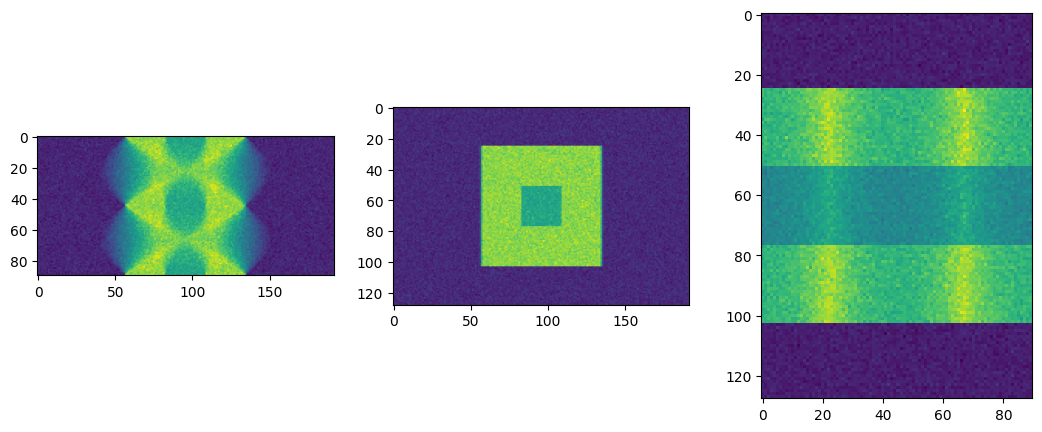

In [10]:
n_iters = 50
sino_noisy = mvtomo.add_poisson(sino, 1000)
mvtomo.volshow(sino_noisy)

In [11]:
rec_sirt = SIRT(np.zeros(phantom.shape), sino_noisy, angles)
rec_mlem = MLEM(np.ones(phantom.shape), sino_noisy, angles)
rec_cgne = CGNE(np.zeros(phantom.shape), sino_noisy, angles)
rec_cgne_nn = CGNE(np.zeros(phantom.shape), sino_noisy, angles, nn_step=3)

vol_sirt, psnr_sirt = rec_sirt(n_iters,oracle = phantom)
vol_mlem, psnr_mlem = rec_mlem(n_iters,oracle = phantom)
vol_cgne, psnr_cgne = rec_cgne(n_iters,oracle = phantom)
vol_cgne2, psnr_cgne2 = rec_cgne_nn(n_iters,oracle = phantom)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

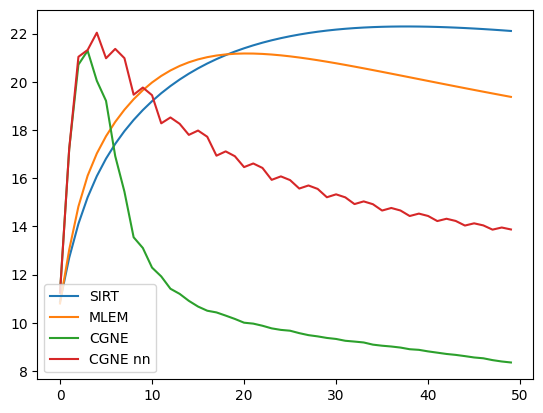

In [12]:
plt.figure()
plt.plot(psnr_sirt, label = 'SIRT')
plt.plot(psnr_mlem, label = 'MLEM')
plt.plot(psnr_cgne, label = 'CGNE')
plt.plot(psnr_cgne2, label = 'CGNE nn')
plt.legend()


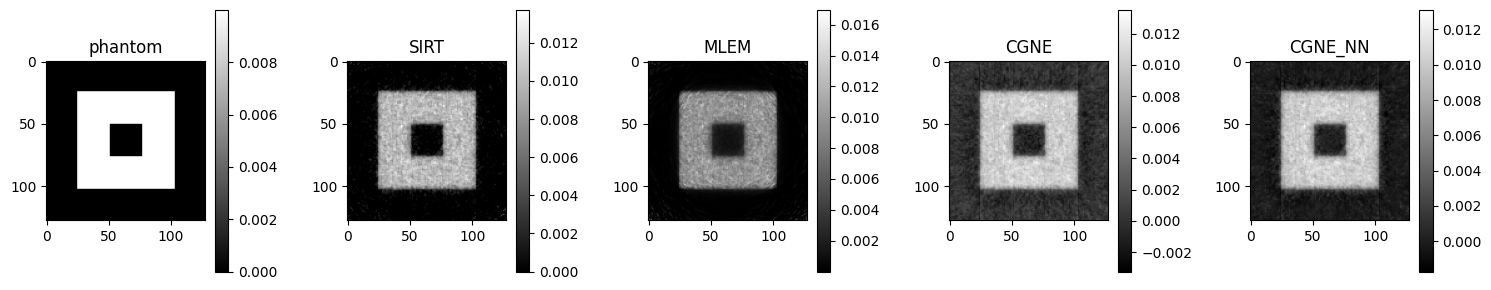

In [29]:
from mvtomo.utils import plot_imgs
plot_imgs(
    phantom=phantom[N//2],   
    SIRT=vol_sirt[N//2],
    MLEM=vol_mlem[N//2],
    CGNE=vol_cgne[N//2],
    CGNE_NN=vol_cgne2[N//2],    
)
